# $k$-NN for a classification problem on the Iris dataset

In this notebook we will train a $k$-nn classifier on [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) data using the class [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier) from the python library [scikit-learn](https://scikit-learn.org/stable/index.html) 

Since it is the first exercice, instructions will be as detailed as possible. But it won't always be the case! 

You can choose to:
- Start from scratch if you feel more comfortable with your own code
- Code mostly on your own and from time to time get inspired by (aka copy/paste :)) this notebook (recommended, especially for the plotting parts)
- Try to fit exactly to this notebook. If your not familiar at all with python it could be a good option but otherwise try at least to think about how you would do without any help. 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection

### Iris dataset

- Load iris data set using [datasets.load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
- Use [model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn-model-selection-train-test-split) to split your dataset into 2 datasets: a training one and a testing one. To split your dataset into 3 simply call this function twice, first to separate trainind data set from validation and test and then to separate validation from test


In [30]:
iris = datasets.load_iris()   # Load Iris dataset
X = iris.data[:, :2]          # Store the first 2 features    
Y = iris.target               # Store the labels


seed = 666                    # Fix random seed for reproducibility
# Shuffle and split the data into train and a concatenation of validation and test sets with a ratio of 0.7/0.3:
X_train, X_val_test, Y_train, Y_val_test = model_selection.train_test_split(X, Y, 
                                                                            train_size=0.7, 
                                                                            shuffle=True, 
                                                                            random_state=seed)

seed = 221
X_val, X_test, Y_val, Y_test = model_selection.train_test_split(X_val_test, Y_val_test, 
                                                                            train_size=0.5, 
                                                                            shuffle=True, 
                                                                            random_state=seed)

# Store number of datapoints in each dataset:
N_train = len(Y_train)
N_val =  len(Y_val)
N_test = len(Y_test)
print("Datapoints used for training:   ", N_train)
print("Datapoints used for validation: ", N_val)
print("Datapoints used for testing :   ", N_test)


Datapoints used for training:    105
Datapoints used for validation:  22
Datapoints used for testing :    23


### Plots parameters

Here is an example of colors you can use for the 3 classes with 
- a light version for the validation points, testing points, and decision boundaries
- a bold version for the training points

In [31]:
### Plot parameters:
# Light colors for decision boundaries plots:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['red', 'darkcyan', 'darkblue'])

### Main functions

**plot_iris**
- To plot a scatter plot of y VS x in python we use [plt.scatter()](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib-pyplot-scatter)

**knn_on_iris**
- To create an instance of the KNeighborsClassifier class use the constructor [neighbors.KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
- To train your instance of KNeighborsClassifier use [KNeighborsClassifier.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit)
- Once trained you can use [KNeighborsClassifier.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) to predict the iris class of a datapoint or of a gridpoint

**draw_knn_boundaries**
- To plot a color plot we use [pcolormesh()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html#matplotlib-pyplot-pcolormesh). To draw the decision boundaries, the idea is to create a meshgrid and to let the knn decides to which color each gridpoint belongs 

In [32]:
def plot_iris(
    X_train,
    Y_train,
    X_val_test,
    Y_val_test,
):
    """
    Scatter plots of training and testing iris datapoints

    Colors represent specific iris species 
    Validation or test points appear in light colors
    Training points appear in bold colors
    """
    # Matplotlib method to get current axis
    ax = plt.gca()    
    # Scatter plot validation or testing points using light colors
    ax.scatter(
        X_val_test[:,0], X_val_test[:,1], c=Y_val_test,
        cmap=cmap_light, edgecolor='k', s=20, zorder=2
    )
    # Overlay the training points in bold colors:
    ax.scatter(
        X_train[:,0], X_train[:,1], c=Y_train,
        cmap=cmap_bold, edgecolor='k', s=20, zorder=2
    )
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    return ax


def draw_knn_boundaries(
    knn, 
    h=0.02,  # Step size in the mesh
):
    """
    Draw boundaries as decided by the trained knn
    """
    ax = plt.gca()
    [xmin, xmax] = ax.get_xlim()
    [ymin, ymax] = ax.get_ylim()
    # Generate the axis associated to the first feature: 
    x_axis = np.arange(xmin, xmax, h)
    # Generate the axis associated to the 2nd feature: 
    y_axis = np.arange(ymin, ymax, h)
    # Generate a meshgrid (2D grid) from the 2 axis:
    x_grid, y_grid = np.meshgrid(x_axis, y_axis)
    # Vectorize the grids into column vectors:
    x_grid_vectorized = x_grid.flatten()
    x_grid_vectorized = np.expand_dims(x_grid_vectorized, axis=1)
    y_grid_vectorized = y_grid.flatten()
    y_grid_vectorized = np.expand_dims(y_grid_vectorized, axis=1)
    # Concatenate the vectorized grids
    grid = np.concatenate((x_grid_vectorized, y_grid_vectorized),
                                  axis=1)
    # Now you can use 'grid' as data to classify by the knn 

    # Predict concatenated features to get the decision boundaries:
    decision_boundaries = knn.predict(grid)

    # Reshape the decision boundaries into a 2D matrix:
    decision_boundaries = decision_boundaries.reshape(x_grid.shape)
    plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light, zorder=1)
    return ax

# Main work here:
def knn_on_iris(
    k,
    X_train,
    Y_train,
    X_val,
    Y_val,
):
    """
    Train a knn and plot its boundaries on iris data
    """

    # --------------------
    # Plot iris data
    # --------------------
    plot_iris(X_train, Y_train, X_val, Y_val) #TODO!

    # --------------------
    # Train the knn
    # --------------------

    # Create an instance of the KNeighborsClassifier class for current value of k:
    k_NN = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier with the training data
    k_NN.fit(X_train,Y_train)

    # --------------------
    # Draw knn boundaries
    # --------------------
    draw_knn_boundaries(k_NN) #TODO!
    plt.title("k-NN classification on Iris, k = " + str(k_NN.get_params().get("n_neighbors")))
    plt.show()

    # --------------------
    # Model accuracy:
    # --------------------

    # Accuracy on train set:
    
    train_predictions = k_NN.predict(X_train)
    good_train_predictions = (train_predictions == Y_train)
    train_accuracy = np.sum(good_train_predictions) / len(X_train)
    # Accuracy on test set:
    val_predictions = k_NN.predict(X_val)
    good_val_predictions = (val_predictions == Y_val)
    val_accuracy = np.sum(good_val_predictions) / len(X_val)
    
    return (k_NN, train_accuracy, val_accuracy)

### Evaluate your $k$-nn

K-nn trained with k =  1
Train accuracy:  0.9333333333333333  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  5
Train accuracy:  0.8571428571428571  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  10
Train accuracy:  0.8  -----  Validation accuracy:  0.7272727272727273
K-nn trained with k =  20
Train accuracy:  0.7714285714285715  -----  Validation accuracy:  0.8636363636363636
K-nn trained with k =  30
Train accuracy:  0.780952380952381  -----  Validation accuracy:  0.8636363636363636


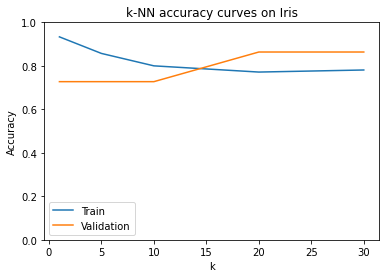

In [33]:
### k-NN on the Iris dataset for different values of k:
# Create vectors to store the results for each k:
train_accuracies = []
val_accuracies = []

# Train a knn for each value of k in k_list
k_list = [1, 5, 10, 20, 30]
for k in k_list:
    
    k_NN = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier with the training data
    k_NN.fit(X_train,Y_train)
    
    train_acc = k_NN.score(X_train, Y_train)
    val_acc = k_NN.score(X_val, Y_val)
    
    print("K-nn trained with k = ", k)
    print("Train accuracy: ", train_acc, " ----- ", "Validation accuracy: ", val_acc)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plot accuracy curves:
plt.plot(k_list, train_accuracies)
plt.plot(k_list, val_accuracies)
plt.ylim(0, 1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.title("k-NN accuracy curves on Iris")

# Display plots:
plt.show()

### Testing your selected model

Now that you have trained several models and plot their accuracies, you can select one model that seems to work well and test it with the test dataset.

/tmp/ipykernel_20357/1287990961.py:63: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_grid, y_grid, decision_boundaries, cmap=cmap_light, zorder=1)


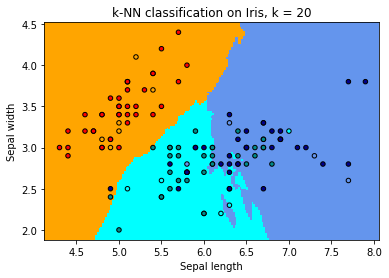

K-nn selected with k =  20
Train accuracy:  0.780952380952381  -----  Validation accuracy:  0.8636363636363636
Test accuracy:  0.8260869565217391


In [34]:
k_selected = 20
(k_NN, train_accuracy, val_accuracy) = knn_on_iris(k_selected,
    X_train,
    Y_train,
    X_val,
    Y_val)

    
test_predictions = k_NN.predict(X_test)
good_test_predictions = (test_predictions == Y_test)
test_acc = np.sum(good_test_predictions) / len(X_test)
print("K-nn selected with k = ", k_selected)
print("Train accuracy: ", train_acc, " ----- ", "Validation accuracy: ", val_acc)
print("Test accuracy: ", test_acc)